In [1]:
from subprocess import Popen
import os
import json
import sys
from signal import SIGINT, SIGTERM
from tempfile import NamedTemporaryFile
import matplotlib.pyplot as plt
import visualize

In [2]:
(stdin, send_stdin) = os.pipe()  # for parent -> child writes
(recv_stdout, stdout) = os.pipe()  # for child -> parent writes
outfile = os.fdopen(send_stdin, 'w', buffering=1) # Buffer line by line
infile = os.fdopen(recv_stdout)

def communicate(obj):
    outfile.write(json.dumps(obj))
    outfile.write('\n')
    outfile.flush()
    if child.poll():
        return child.wait()
    return json.loads(infile.readline())

def raytrace(inp):
    inp = inp.copy()
    with NamedTemporaryFile(suffix='.bin', mode='w+b') as f:
        inp['bin_file'] = f.name
        img_md = communicate(inp)
        img = f.read()
    return (img, img_md)

In [3]:
child = Popen(['/Users/seth/Code/celeritas/build-ndebug/bin/celer-geo', '-'],
              stdin=stdin, stdout=stdout,
              env={"CELER_COLOR": "1"})

In [4]:
communicate({
    "geometry_file": "/Users/seth/Documents/work/celeritas-benchmarks/celer-g4/cms-hgcal/input/TBHGCal181Oct.gdml"
})

info: Reading JSON line input from <stdin>
info: Loading Geant4 geometry from GDML at /Users/seth/Documents/work/celeritas-benchmarks/celer-g4/cms-hgcal/input/TBHGCal181Oct.gdml


{'cuda_heap_size': None,
 'cuda_stack_size': None,
 'geometry_file': '/Users/seth/Documents/work/celeritas-benchmarks/celer-g4/cms-hgcal/input/TBHGCal181Oct.gdml'}

status: Tracing orange image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmpbevv1tps.bin'


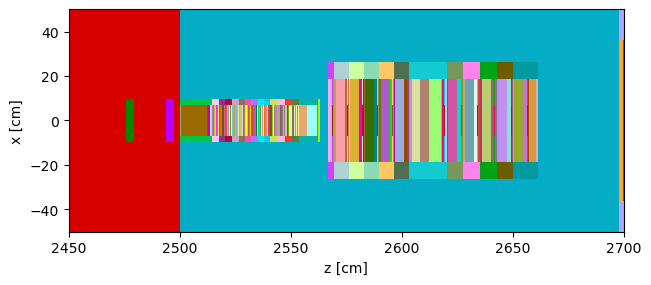

In [5]:
inp = {
    'geometry': 'orange',
     'image': {'_units': 'cgs',
      'lower_left': [-50.1, 0.01, 2450],
      'upper_right': [50.1, 0.01, 2700],
      'rightward': [0.0, 0.0, 1.0],
      'vertical_pixels': 512},
     'memspace': 'host',
     'volumes': True,
    'bin_file': None,
}
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing geant4 image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmp9u002cpg.bin'


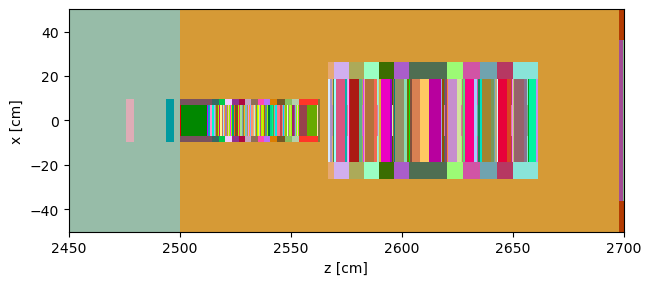

In [6]:
inp['geometry'] = 'geant4'
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing orange image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmpt181fegt.bin'


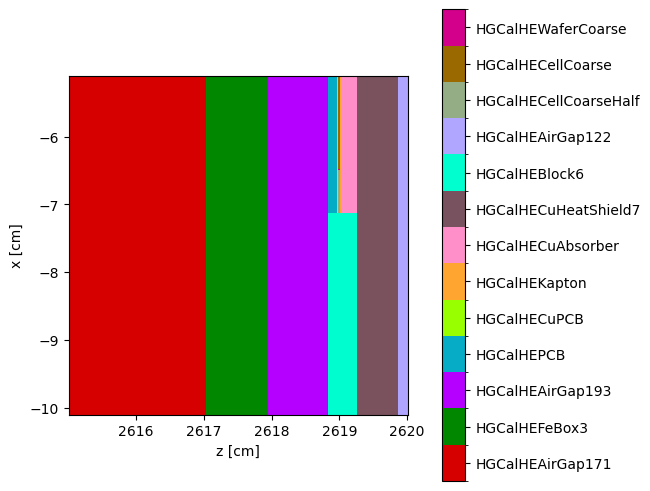

In [7]:
inp = {
    'geometry': 'orange',
     'image': {'_units': 'cgs',
      'lower_left': [-10.1, 0.01, 2615.01],
      'upper_right': [-5.1, 0.01, 2620.01],
      'rightward': [0.0, 0.0, 1.0],
      'vertical_pixels': 512},
     'memspace': 'host',
     'volumes': True,
    'bin_file': None,
}
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing geant4 image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmp55c962bw.bin'


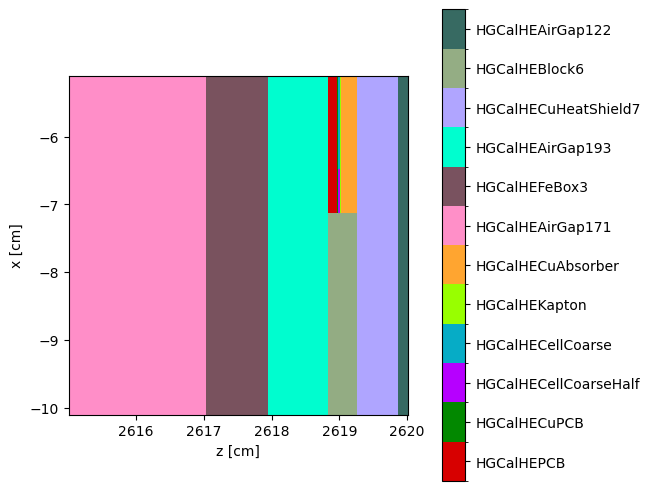

In [8]:
inp['geometry'] = 'geant4'
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

In [9]:
def make_inp(r, z):
    return {
    'geometry': 'orange',
     'image': {'_units': 'cgs',
      'lower_left': [-r, -r, z],
      'upper_right': [r, r, z],
      'rightward': [1.0, 0.0, 0.0],
      'vertical_pixels': 512},
     'memspace': 'host',
     'volumes': True,
    'bin_file': None,
    }

status: Tracing orange image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmp967ai6ml.bin'


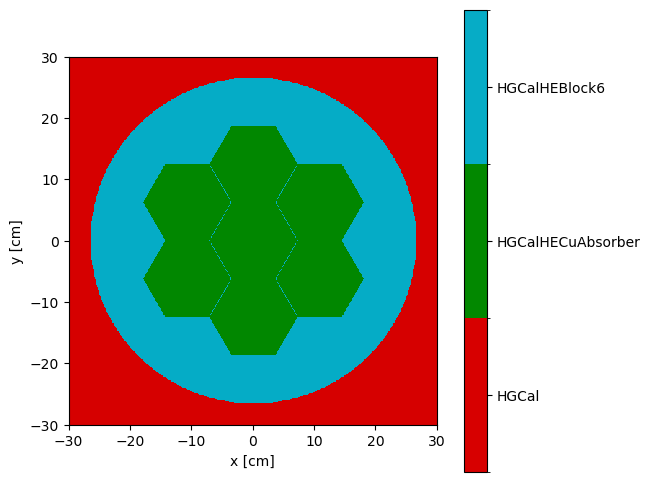

In [10]:
inp = make_inp(r = 30, z = 2619.01)
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing geant4 image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmpwyx_9slr.bin'


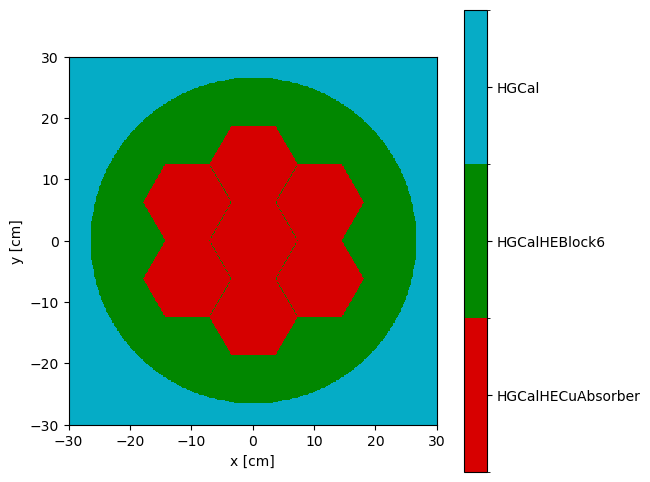

In [11]:
inp['geometry'] = 'geant4'
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

In [12]:
inp['geometry'] = 'vecgeom'
(img, img_md) = raytrace(inp)

status: Tracing vecgeom image on host
/Users/seth/Code/celeritas/app/celer-geo/celer-geo.cc:214: error: Failed raytrace: celeritas: configuration error: required dependency is disabled in this build: vecgeom
/Users/seth/Code/celeritas/app/celer-geo/Runner.cc:190: failure


In [13]:
img_md

{'_category': 'result',
 '_label': 'exception',
 'file': '/Users/seth/Code/celeritas/app/celer-geo/Runner.cc',
 'line': 190,
 'type': 'RuntimeError',
 'what': 'vecgeom',
 'which': 'configuration'}

In [14]:
# Exit the program
communicate(None)

{'runtime': {'device': None,
  'kernels': [],
  'version': '0.5.0-dev.113+03ef82d0a'},
 'timers': {'load_geant4': 0.701206666,
  'load_orange': 0.109816083,
  'raytrace_geant4_host': 0.16208966600000002,
  'raytrace_orange_host': 0.13575324900000002}}